TL:DR Un examen superficiel suggère que le Ramadan est lié à une diminution de fréquentation des cantines.  
Il faut tenir compte du fait que le Ramadan se situe en fin d'année scolaire, une période de diminution de fréquentation.  
A partir de là, il est presque impossible d'évaluer si le Ramadan contribue à une baisse de fréquentation.  
Au final, on n'obtient aucun effet robuste. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os


In [2]:
df = pd.read_csv('244400404_effectifs-eleves-cleaned')
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957


In [3]:
df['datetime']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d"))
df['joursem']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").weekday())
df['isoweek']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").isocalendar().week)

In [4]:
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06,1,36
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05,0,36
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05,0,36
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05,0,36
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05,0,36


In [5]:
df_calend=pd.read_csv('../../data/DataGithub/ramadan.csv')
df_calend['datetime']= df_calend['date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%d/%m/%Y"))
df_calend.drop(columns=['date'], inplace=True)
df_calend.head()

,ramadan,datetime
0,1,2021-04-13
1,1,2021-04-14
2,1,2021-04-15
3,1,2021-04-16
4,1,2021-04-17


In [6]:
df_calend.shape

(329, 2)

In [7]:
df_calend['datetime'].apply(lambda dt1 : dt1.year).value_counts()

2021    30
2018    30
2015    30
2012    30
2020    30
2017    30
2014    30
2019    30
2016    30
2013    30
2011    29
Name: datetime, dtype: int64

In [8]:
df=pd.merge(df, df_calend, how='left', on='datetime')
df['ramadan'].fillna(0, inplace=True)
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek,ramadan
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06,1,36,0.0
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05,0,36,0.0
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05,0,36,0.0
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05,0,36,0.0
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05,0,36,0.0


In [9]:
pd.pivot_table( df[['ramadan','An','datetime']].groupby(['ramadan','An']).count(), index=['ramadan'],columns='An', values='datetime', aggfunc=int)

An,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ramadan,,,,,,,,,,,,
0.0,11736.0,12220.0,10802.0,11546.0,9050.0,9844.0,10650.0,10278.0,9814.0,9135.0,10217.0,5293.0
1.0,NaN,NaN,NaN,337.0,519.0,955.0,1294.0,1322.0,1299.0,40.0,818.0,NaN


In [10]:
df[['ramadan','RéelNorm']].groupby('ramadan').mean()

,RéelNorm
ramadan,
0.0,0.994333
1.0,0.956794


In [11]:
df[['ramadan','RéelNorm']].groupby('ramadan').median()

,RéelNorm
ramadan,
0.0,1.000000
1.0,0.984848


Le Ramadan semble avoir un effet, examinons si celui-ci est stable dans le temps.

In [12]:
pd.pivot_table( df[['ramadan','An','RéelNorm']].groupby(['ramadan','An']).median(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ramadan,,,,,,,,,,,,
0.0,1.0,1.0,1.0,1.00,1.000000,1.005883,1.000000,1.000000,1.000000,1.005714,1.004367,1.0
1.0,NaN,NaN,NaN,0.88,0.947368,0.944444,0.995475,1.005353,1.002841,0.258921,0.977343,NaN


In [13]:
pd.pivot_table( df[['ramadan','An','RéelNorm']].groupby(['ramadan','An']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ramadan,,,,,,,,,,,,
0.0,1.008798,1.003369,1.008741,1.014771,1.003016,1.013810,0.996775,0.989344,0.978019,0.943689,0.988274,0.95046
1.0,NaN,NaN,NaN,0.859027,0.912026,0.914466,0.984185,0.992922,0.985089,0.309517,0.959898,NaN


L'effet n'est pas vraiment stable d'une année sur l'autre. Soit il y a un effet aléatoire, soit un autre facteur est à l'oeuvre. Examinons la date de début de Ramadan.  
On note aussi que le résultat obtenu en 2020 est une anomalie sans doute due à l'épidémie de covid.
Il semble raisonnable "d'effacer" le Ramadan de 2020 car c'est sans doute le covid qui a eu un effet dominant pendant la péiode de Ramadan. 

In [14]:
df_calend=df_calend[df_calend['datetime'].apply(lambda dt1 : dt1.year != 2020)]

In [15]:
df = pd.read_csv('244400404_effectifs-eleves-cleaned')
df['datetime']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d"))
df['joursem']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").weekday())
df['isoweek']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").isocalendar().week)
df=pd.merge(df, df_calend, how='left', on='datetime')
df['ramadan'].fillna(0, inplace=True)
df.head()


,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek,ramadan
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06,1,36,0.0
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05,0,36,0.0
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05,0,36,0.0
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05,0,36,0.0
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05,0,36,0.0


In [16]:
pd.pivot_table( df[['ramadan','An','isoweek']].groupby(['ramadan','An']).min(), index=['ramadan'],columns='An', values='isoweek', aggfunc=np.mean)

An,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ramadan,,,,,,,,,,,,
0.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0
1.0,NaN,NaN,NaN,27.0,25.0,23.0,22.0,20.0,19.0,NaN,17.0,NaN


L'effet du Ramadan semble se manifester quand il débute en fin d'année scolaire avec isoweek>=23.  
Examinons plus directement l'effet du Ramadan en fonction de la période à laquelle il se produit :

<AxesSubplot:xlabel='isoweek'>

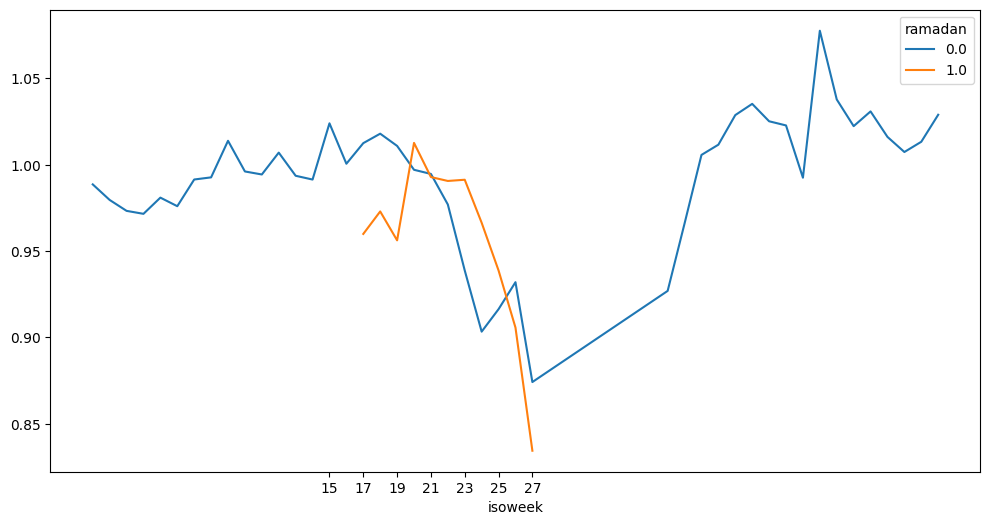

In [17]:
pd.pivot_table( df[['ramadan','RéelNorm','isoweek']].groupby(['ramadan','isoweek']).mean(), index=['isoweek'],columns='ramadan', values='RéelNorm', aggfunc=np.mean).plot.line(figsize=(12,6), xticks=range(15,28,2))

L'effet du Ramadan ne semble pas extrêmement stable selon le paramètre isoweek.  
La baisse de fréquentation observée en semaine 27 est particulièrement marquée, nous essaierons de savoir si elle est robuste.

In [18]:
df['Mois']=df['datetime'].apply(lambda dt1 : dt1.month)

<AxesSubplot:xlabel='Mois'>

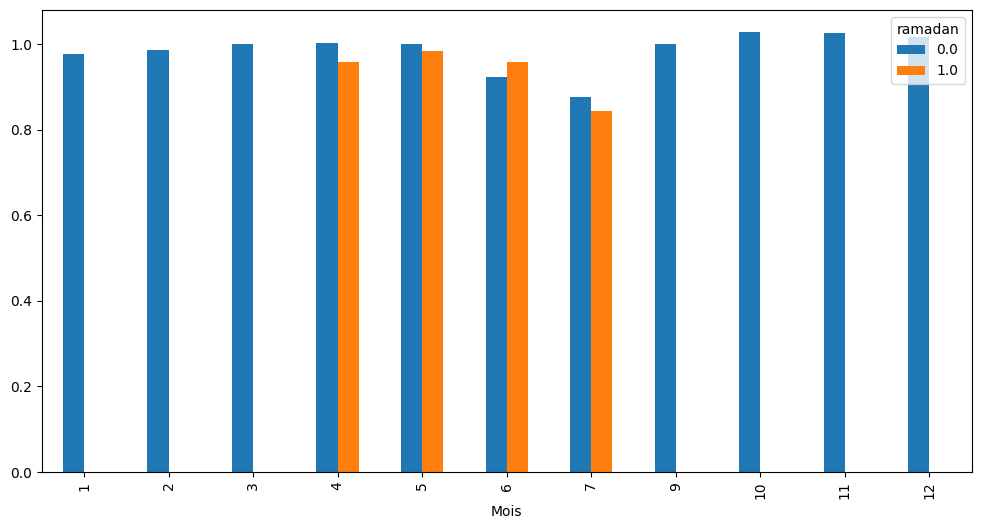

In [19]:
pd.pivot_table( df[['ramadan','RéelNorm','Mois']].groupby(['ramadan','Mois']).mean(), index=['Mois'],columns='ramadan', values='RéelNorm', aggfunc=np.mean).plot.bar(figsize=(12,6))

Examinons la fréquentation en fixant le mois et en faisant varier l'année

In [20]:
pd.pivot_table( df[df['Mois']==4][['ramadan','An','RéelNorm']].groupby(['ramadan','An']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ramadan,,,,,,,,,,,,
0.0,1.023287,1.001981,1.008373,1.013374,1.012134,0.984339,1.012677,0.986255,0.981688,0.280899,0.945761,1.023271
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959953,NaN


La différence observée en avril est artificielle et due uniquement à l'année 2021.  

Passons au mois de mai

In [21]:
pd.pivot_table( df[df['Mois']==5][['ramadan','An','RéelNorm']].groupby(['ramadan','An']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ramadan,,,,,,,,,,,,
0.0,1.01526,0.998223,1.014823,1.009187,0.996248,0.982455,0.994769,1.007701,1.025030,0.284841,0.965815,1.060636
1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.985090,0.980685,0.995776,NaN,0.959859,NaN


La baisse de fréquentation se répète sur plusieurs années mais son amplitude semble instable.  

Passons à Juin

In [22]:
pd.pivot_table( df[df['Mois']==6][['ramadan','An','RéelNorm']].groupby(['ramadan','An']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ramadan,,,,,,,,,,,
0.0,0.952532,0.989707,0.982844,0.982742,0.981633,0.935274,0.918533,0.945156,0.962733,0.604551,0.978861
1.0,NaN,NaN,NaN,0.835087,0.912026,0.937359,0.984047,1.004164,0.902604,NaN,NaN


Au premier abord, la différence de fréquentation semble instable sur le période étudiée.  

Les baisses de 2014 et 2015 sont sans doute liées au fait que le Ramadan commence fin juin et se prolonge en juillet comme on le voit sur le graphique suivant.  
La baisse sur 2014 et 2015 est donc en grande partie du à la fin de l'année, il est difficile d'évaluer la part du Ramadan dans ce contexte.  
Il nous reste un mélange de baisses, d'augmentations et de stagnations sur 2016-2019. Difficile de proposer une hypothèse sur la base de ces quatre années.

In [23]:
pd.pivot_table( df[df['Mois']==7][['ramadan','An','RéelNorm']].groupby(['ramadan','An']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014,2016,2017,2018,2019,2020,2021
ramadan,,,,,,,,,,
0.0,0.963416,0.853372,0.870569,NaN,NaN,0.851992,0.866028,0.867633,0.921914,0.906031
1.0,NaN,NaN,NaN,0.866849,0.80722,NaN,NaN,NaN,NaN,NaN


La baisse de fréquentation observée lors du Ramadan se superpose avec l'effet de fin d'année.  
La fin d'année 2014 recouvre le Ramadan mais ne se distingue pas des autres fins d'années.   
Seule la fréquentation lors du Ramadan 2016 semble réellement basse, on ne peut pas tirer de conclusions sur une seule année.  
Il est trés vraisemblable que la faible fréquentation observée en semaine 27 soit due à la seule année 2016.

Au final, on ne peut pas affirmer que le Ramadan ait un effet robuste sur la fréquentation.

Il semble que le Ramadan fasse diminuer la fréquentation des cantines pendant certaines périodes spécifiques et  notamment pendant les deux dernières semaines de l'année scolaire.

In [24]:
df_ramadan1 = df[['Nom du site','ramadan','RéelNorm']].groupby(['Nom du site','ramadan']).median()
df_ramadan2= pd.pivot_table(df_ramadan1, index=['Nom du site'],columns='ramadan', values='RéelNorm', aggfunc=np.mean)
df_ramadan2.sort_values(by=1.0, ascending=True).head(30)

ramadan,0.0,1.0
Nom du site,,
ALAIN FOURNIER,1.000000,0.714286
JEAN ZAY,1.002203,0.719388
CHENE D'ARON,1.006329,0.819767
MAURICE MACE,1.000000,0.858639
CHAUVINIERE,1.005714,0.874286
JOSEPHINE BAKER,1.000000,0.907692
MARSAUDERIES,1.000000,0.925501
JEAN MOULIN,1.004367,0.930131
ALAIN FOURNIER E,1.012821,0.933775


Examinons l'effet du Ramadan sur les premiers établissements de la liste en faisant un suivi selon les années.

In [25]:
pd.pivot_table(df[df['Nom du site']=='ALAIN FOURNIER'][['An','ramadan','RéelNorm']].groupby(['An','ramadan']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014
ramadan,,,,
0.0,0.989763,0.980495,0.976218,1.023352
1.0,NaN,NaN,NaN,0.700680


In [26]:
pd.pivot_table(df[df['Nom du site']=='JEAN ZAY'][['An','ramadan','RéelNorm']].groupby(['An','ramadan']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014
ramadan,,,,
0.0,0.981165,0.983615,0.974689,1.015403
1.0,NaN,NaN,NaN,0.790816


In [27]:
pd.pivot_table(df[df['Nom du site']=="CHENE D'ARON"][['An','ramadan','RéelNorm']].groupby(['An','ramadan']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014
ramadan,,,,
0.0,1.244844,1.172451,1.223121,1.205909
1.0,NaN,NaN,NaN,0.905523


In [28]:
pd.pivot_table(df[df['Nom du site']=="MAURICE MACE"][['An','ramadan','RéelNorm']].groupby(['An','ramadan']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014
ramadan,,,,
0.0,0.986977,0.98167,0.976664,1.006293
1.0,NaN,NaN,NaN,0.875000


In [29]:
pd.pivot_table(df[df['Nom du site']=="CHAUVINIERE"][['An','ramadan','RéelNorm']].groupby(['An','ramadan']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014
ramadan,,,,
0.0,1.063996,1.073845,1.065306,1.100752
1.0,NaN,NaN,NaN,0.941429


In [30]:
pd.pivot_table(df[df['Nom du site']=="JOSEPHINE BAKER"][['An','ramadan','RéelNorm']].groupby(['An','ramadan']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2020,2021,2022
ramadan,,,
0.0,1.010302,1.220651,0.930478
1.0,NaN,0.863077,NaN


In [31]:
pd.pivot_table(df[df['Nom du site']=="MARSAUDERIES"][['An','ramadan','RéelNorm']].groupby(['An','ramadan']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014
ramadan,,,,
0.0,1.050237,1.092222,1.102083,1.086069
1.0,NaN,NaN,NaN,0.955587


Après une longue série de différences artificielle, l'établissement JEAN MOULIN semble être un exemple légitime.

In [32]:
pd.pivot_table(df[df['Nom du site']=="JEAN MOULIN"][['An','ramadan','RéelNorm']].groupby(['An','ramadan']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ramadan,,,,,,,,,,,,
0.0,1.000791,1.023953,1.007267,1.035537,1.043311,1.067586,1.021337,1.026917,1.006242,0.970604,0.975292,0.982923
1.0,NaN,NaN,NaN,0.891892,0.972944,0.936709,0.951564,0.966032,0.941406,NaN,0.942358,NaN


In [33]:
pd.pivot_table(df[df['Nom du site']=="ALAIN FOURNIER E"][['An','ramadan','RéelNorm']].groupby(['An','ramadan']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2014,2015,2016,2017,2018,2019,2020,2021,2022
ramadan,,,,,,,,,
0.0,1.045007,1.104041,1.119172,1.104577,1.056167,1.063518,0.961165,0.984847,1.011097
1.0,NaN,0.731982,0.852273,1.029915,0.761087,1.106654,NaN,0.998344,NaN


In [34]:
pd.pivot_table(df[df['Nom du site']=="PLESSIS CELLIER"][['An','ramadan','RéelNorm']].groupby(['An','ramadan']).mean(), index=['ramadan'],columns='An', values='RéelNorm', aggfunc=np.mean)

An,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ramadan,,,,,,,,,,,,
0.0,0.988558,1.01861,0.98611,1.010946,1.031675,1.004273,1.015832,1.001281,0.988840,0.967644,0.956423,0.95223
1.0,NaN,NaN,NaN,0.804348,0.828125,0.894590,0.976218,1.002778,0.944249,NaN,0.905500,NaN


En examinant des établissements individuels, il n'est pas facile du tout d'en identifier qui seraient particulièrement affectés par le ramadan.  
Il y aurait vraiment un travail de fond à fournir pour trouvers des cas robustes.

In [37]:
# df_calend.to_csv('calendrier_ramadan.csv')